In [1]:
%load_ext autoreload
%autoreload 2

In [158]:
from dataloader import read_csv, convert_to_lowercase
from preprocessing import preprocess_data_for_classification
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [137]:
trainX, trainY = read_csv('data/train.csv', ylabel='price')
testX, _ = read_csv('data/test.csv')

In [138]:
df_trainY = pd.DataFrame(data=trainY, columns=['price'])
column_names = list(trainX.columns.values)
column_names.append('price')
train_X_Y = pd.concat([trainX, df_trainY],axis=1, ignore_index=True, sort=False)
train_X_Y.columns = column_names
train_X_Y = convert_to_lowercase(train_X_Y)

In [139]:
train_X_Y.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,...,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500.0
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,...,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400.0
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,...,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000.0
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,condo,freehold,2023.0,3.0,2.0,958,...,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000.0
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,...,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000.0


In [142]:
df_property_type_average_price = train_X_Y.groupby('property_type', as_index=False)['price'].mean()
df_property_type_average_price.rename(columns={'price': 'average_price'}, inplace=True)
df_property_type_average_price.sort_values(by=['average_price'], ascending=False, inplace=True)

In [143]:
df_property_type_average_price.head(100)

,property_type,average_price
14,land only,5.144895e+07
11,hdb 4 rooms,4.003058e+07
7,good class bungalow,3.783150e+07
1,bungalow,1.730146e+07
4,conservation house,8.641843e+06
16,semi-detached house,7.705623e+06
5,corner terrace,6.230950e+06
15,landed,5.409970e+06
19,townhouse,5.171600e+06
18,terraced house,4.869576e+06


[Text(0.5, 1.0, 'Average prices of different property_types'),
 Text(0.5, 0, 'average_price'),
 Text(0, 0.5, 'property_type')]

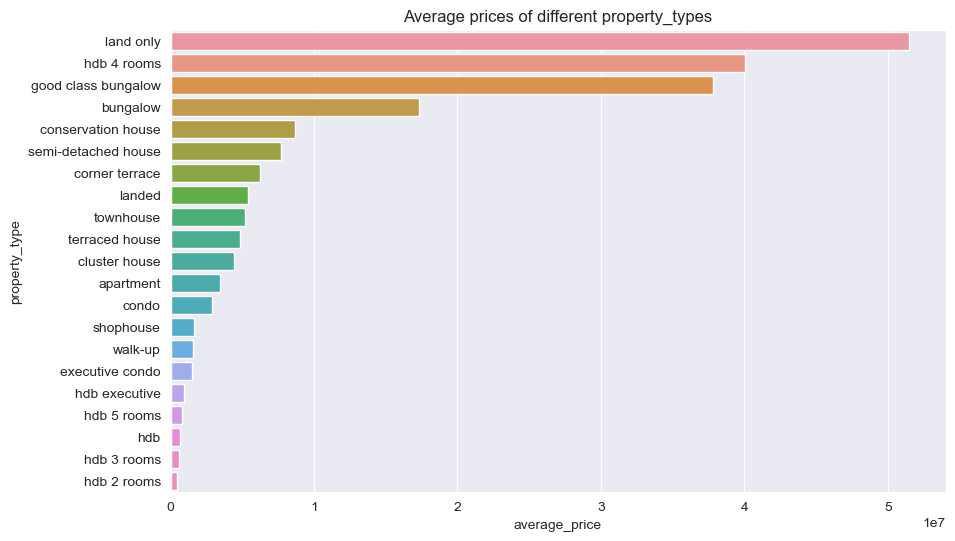

In [176]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_property_type_average_price, y='property_type', x='average_price', orient='h')
ax.set(title='Average prices of different property_types', xlabel='average_price', ylabel='property_type')
# container = ax.containers[0]
# ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
# ax.bar_label(ax.containers[0])
# ax.tick_params(axis='x', rotation=90)

In [146]:
df_property_type_counts = train_X_Y.groupby('property_type', as_index=False)['price'].count()
df_property_type_counts.rename(columns={'price': 'count'}, inplace=True)
df_property_type_counts.sort_values(by=['count'], ascending=False, inplace=True)

In [147]:
df_property_type_counts.head(100)

,property_type,counts
3,condo,9648
8,hdb,2797
10,hdb 3 rooms,1193
11,hdb 4 rooms,1124
16,semi-detached house,1018
6,executive condo,1010
1,bungalow,747
12,hdb 5 rooms,679
0,apartment,540
18,terraced house,446


[Text(0.5, 1.0, 'Counts of different property_types'),
 Text(0.5, 0, 'counts'),
 Text(0, 0.5, 'property_type')]

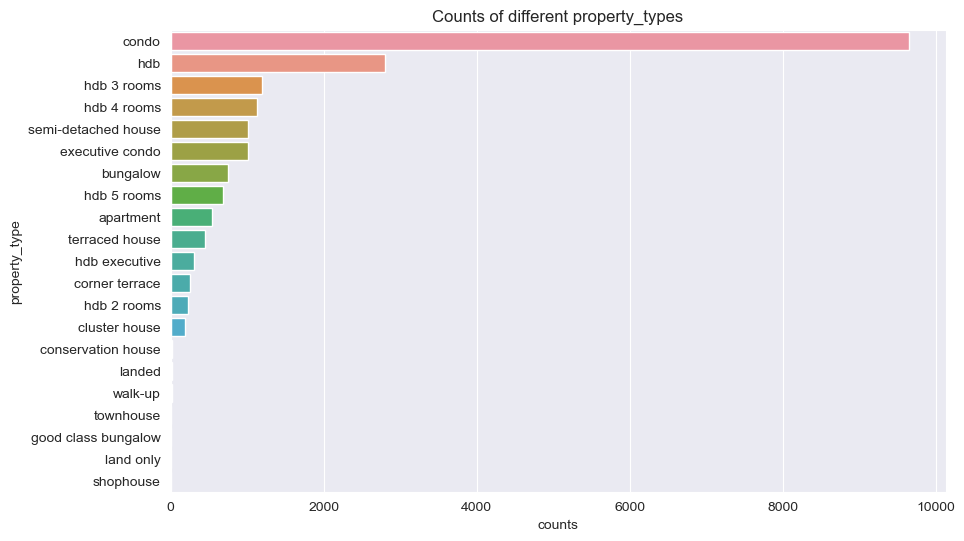

In [177]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_property_type_counts, y='property_type', x='count', orient='h')
ax.set(title='Counts of different property_types', xlabel='count', ylabel='property_type')
# ax.bar_label(ax.containers[0])

In [178]:
trainX, trainY = read_csv('data/train.csv', ylabel='price')
testX, _ = read_csv('data/test.csv')

In [179]:
trainX, trainY, testX = preprocess_data_for_classification(trainX, trainY, testX, perform_one_hot_encoding=False)

Training Data Shape :  (20254, 23)


In [180]:
trainX.head()

,property_type,tenure,built_year,num_beds,num_baths,size_sqft,furnishing,total_num_units,lat,lng,...,2 br,3 br,4 br,5 br,6 br,7 br,8 br,9 br,10 br,studio
0,0,0,1988.0,3.0,2.0,1115,0,116.000000,1.414399,103.837196,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1992.0,4.0,2.0,1575,0,376.253938,1.372597,103.875625,...,True,True,True,True,True,False,False,False,False,False
2,2,2,2022.0,4.0,6.0,3070,1,56.000000,1.298773,103.895798,...,False,True,True,True,True,False,False,False,False,True
3,2,2,2023.0,3.0,2.0,958,1,638.000000,1.312364,103.803271,...,True,True,True,False,False,False,False,False,False,True
4,2,1,2026.0,2.0,1.0,732,0,351.000000,1.273959,103.843635,...,True,True,True,True,False,False,False,False,False,True


In [181]:
df_trainY = pd.DataFrame(data=trainY, columns=['price'])
column_names = list(trainX.columns.values)
column_names.append('price')
train_X_Y = pd.concat([trainX, df_trainY],axis=1, ignore_index=True, sort=False)
train_X_Y.columns = column_names

In [192]:
train_X_Y.head()

,property_type,tenure,built_year,num_beds,num_baths,size_sqft,furnishing,total_num_units,lat,lng,...,3 br,4 br,5 br,6 br,7 br,8 br,9 br,10 br,studio,price
0,0,0,1988.0,3.0,2.0,1115,0,116.000000,1.414399,103.837196,...,False,False,False,False,False,False,False,False,False,514500.0
1,1,1,1992.0,4.0,2.0,1575,0,376.253938,1.372597,103.875625,...,True,True,True,True,False,False,False,False,False,995400.0
2,2,2,2022.0,4.0,6.0,3070,1,56.000000,1.298773,103.895798,...,True,True,True,True,False,False,False,False,True,8485000.0
3,2,2,2023.0,3.0,2.0,958,1,638.000000,1.312364,103.803271,...,True,True,False,False,False,False,False,False,True,2626000.0
4,2,1,2026.0,2.0,1.0,732,0,351.000000,1.273959,103.843635,...,True,True,True,False,False,False,False,False,True,1764000.0


In [212]:
df_built_year_average_price = train_X_Y.groupby('built_year', as_index=False)['price'].mean()
df_built_year_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [226]:
df_built_year_average_price.head(100)

,built_year,average_price
0,1963.0,4.326788e+06
1,1967.0,4.519658e+05
2,1968.0,8.046500e+05
3,1969.0,3.885268e+05
4,1970.0,3.502442e+06
...,...,...
59,2024.0,2.866441e+06
60,2025.0,3.457650e+06
61,2026.0,2.616486e+06
62,2027.0,1.629972e+06


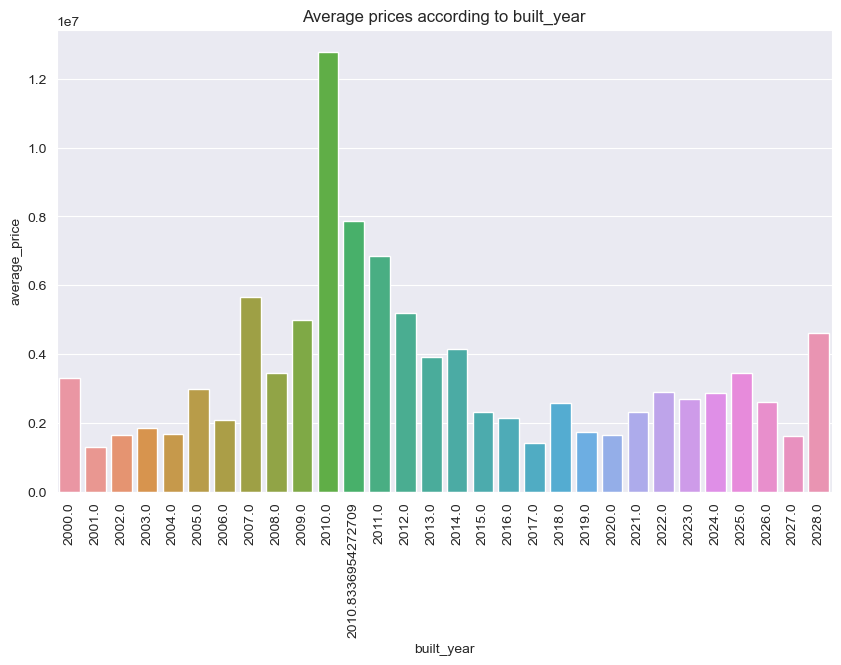

In [215]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_built_year_average_price[df_built_year_average_price['built_year'] >= 2000.0], x='built_year', y='average_price')
ax.set(title='Average prices according to built_year', xlabel='built_year', ylabel='average_price')
ax.tick_params(axis='x', rotation=90)

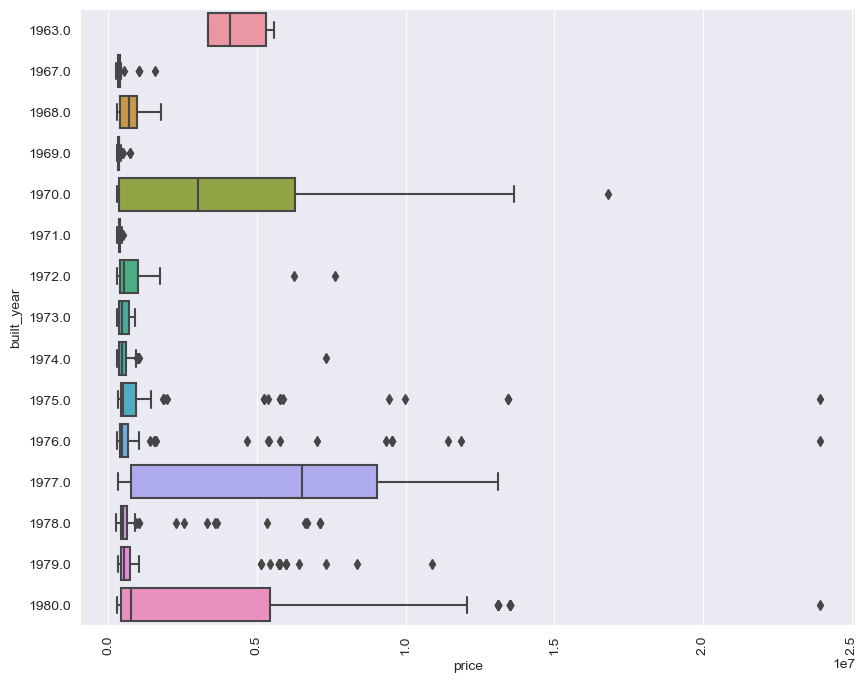

In [265]:
data_sub = train_X_Y[train_X_Y['built_year'] <= 1980][['built_year', 'price']]
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=data_sub, y='built_year', x='price', orient='h')
ax.tick_params(axis='x', rotation=90)

In [183]:
df_num_beds_average_price = train_X_Y.groupby('num_beds', as_index=False)['price'].mean()
df_num_beds_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [184]:
df_num_beds_average_price.head(100)

,num_beds,average_price
0,1.000000,2.755529e+07
1,2.000000,1.502765e+06
2,3.000000,1.735104e+06
3,3.122931,2.468898e+06
4,4.000000,4.006968e+06
5,5.000000,8.114927e+06
6,6.000000,1.049198e+07
7,7.000000,1.352549e+07
8,8.000000,1.872304e+07
9,9.000000,1.517184e+07


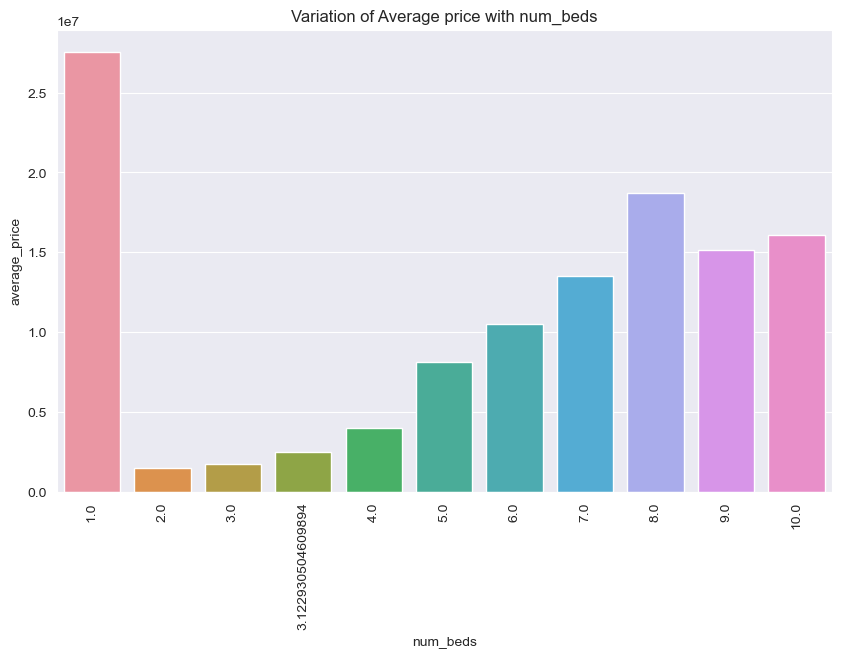

In [190]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_num_beds_average_price, x='num_beds', y='average_price')
ax.set(title='Variation of Average price with num_beds', xlabel='num_beds', ylabel='average_price')
ax.tick_params(axis='x', rotation=90)

In [188]:
df_num_baths_average_price = train_X_Y.groupby('num_baths', as_index=False)['price'].mean()
df_num_baths_average_price.rename(columns={'price': 'average_price'}, inplace=True)

In [189]:
df_num_baths_average_price.head(100)

,num_baths,average_price
0,1.000000,1.311694e+06
1,2.000000,1.363293e+06
2,2.643542,3.226824e+06
3,3.000000,3.030645e+06
4,4.000000,5.501066e+06
5,5.000000,9.234457e+06
6,6.000000,1.010121e+07
7,7.000000,1.168445e+07
8,8.000000,1.598715e+07
9,9.000000,1.819608e+07


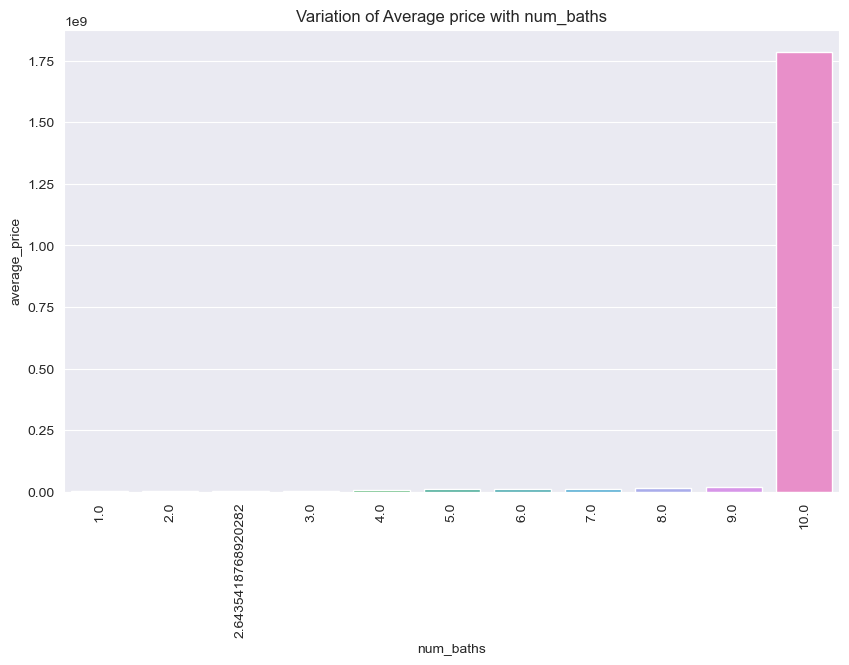

In [191]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_num_baths_average_price, x='num_baths', y='average_price')
ax.set(title='Variation of Average price with num_baths', xlabel='num_baths', ylabel='average_price')
ax.tick_params(axis='x', rotation=90)